<a href="https://colab.research.google.com/github/InduwaraRathnayake/In22-S4-CS3111-Intro-to-ML/blob/week2/Week_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Framing ML problem and feature encoding

## 1. One-hot encoding



This section focuses on preparing the data for machine learning
by applying one-hot encoding to categorical features.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

In [ ]:
# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/In22-S4-CS3111 - Intro to ML/data-one-hot-encoder.csv")

In [ ]:
df.head() # Display the top 5 rows of the dataframe

,Id,Colour,Country
0,1,Red,USA
1,2,Red,USA
2,3,Blue,UK
3,4,Green,Canada
4,5,Green,Canada


In [ ]:
df.tail() # Display the bottom 5 rows of the dataframe

,Id,Colour,Country
295,296,Blue,USA
296,297,Green,USA
297,298,Green,UK
298,299,Green,Canada
299,300,Blue,USA


In [ ]:
df.dtypes #data type of columns

,0
Id,int64
Colour,object
Country,object


In [ ]:
df["Colour"].unique() # Get unique values in the 'Colour' column

array(['Red', 'Blue', 'Green'], dtype=object)

In [ ]:
df["Country"].unique() # Get unique values in the 'Country' column

array(['USA', 'UK', 'Canada'], dtype=object)

In [ ]:
ohe = OneHotEncoder() # Create a OneHotEncoder object
print(ohe)

OneHotEncoder()


In [ ]:
ohe.fit_transform(df[["Colour", "Country"]]).toarray()

array([[0., 0., 1., 0., 0., 1.],
       [0., 0., 1., 0., 0., 1.],
       [1., 0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 1., 0.],
       [0., 1., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 1.]])

In [ ]:
feature_array = ohe.fit_transform(df[["Colour", "Country"]]).toarray() # Apply one-hot encoding to the 'Colour' and 'Country' columns
print(feature_array)

[[0. 0. 1. 0. 0. 1.]
 [0. 0. 1. 0. 0. 1.]
 [1. 0. 0. 0. 1. 0.]
 ...
 [0. 1. 0. 0. 1. 0.]
 [0. 1. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 1.]]


In [ ]:
ohe.categories_

[array(['Blue', 'Green', 'Red'], dtype=object),
 array(['Canada', 'UK', 'USA'], dtype=object)]

In [ ]:
feature_labels = ohe.categories_ # Get the categories identified by the OneHotEncoder

In [ ]:
# save the 2 arrays into 1 array
np.array(feature_labels).ravel()

array(['Blue', 'Green', 'Red', 'Canada', 'UK', 'USA'], dtype=object)

In [ ]:
feature_labels = np.array(feature_labels).ravel() # Flatten the feature labels array
print(feature_labels)

['Blue' 'Green' 'Red' 'Canada' 'UK' 'USA']


In [ ]:
pd.DataFrame(feature_array, columns=feature_labels) # Create a dataframe from the feature array and labels

,Blue,Green,Red,Canada,UK,USA
0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...
295,1.0,0.0,0.0,0.0,0.0,1.0
296,0.0,1.0,0.0,0.0,0.0,1.0
297,0.0,1.0,0.0,0.0,1.0,0.0
298,0.0,1.0,0.0,1.0,0.0,0.0


In [ ]:
features = pd.DataFrame(feature_array, columns=feature_labels)

In [ ]:
print(features)

     Blue  Green  Red  Canada   UK  USA
0     0.0    0.0  1.0     0.0  0.0  1.0
1     0.0    0.0  1.0     0.0  0.0  1.0
2     1.0    0.0  0.0     0.0  1.0  0.0
3     0.0    1.0  0.0     1.0  0.0  0.0
4     0.0    1.0  0.0     1.0  0.0  0.0
..    ...    ...  ...     ...  ...  ...
295   1.0    0.0  0.0     0.0  0.0  1.0
296   0.0    1.0  0.0     0.0  0.0  1.0
297   0.0    1.0  0.0     0.0  1.0  0.0
298   0.0    1.0  0.0     1.0  0.0  0.0
299   1.0    0.0  0.0     0.0  0.0  1.0

[300 rows x 6 columns]


In [ ]:
features.head()

,Blue,Green,Red,Canada,UK,USA
0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,1.0,0.0,0.0


In [ ]:
# Concatenate the original dataframe with the encoded features
pd.concat([df, features], axis=1)

,Id,Colour,Country,Blue,Green,Red,Canada,UK,USA
0,1,Red,USA,0.0,0.0,1.0,0.0,0.0,1.0
1,2,Red,USA,0.0,0.0,1.0,0.0,0.0,1.0
2,3,Blue,UK,1.0,0.0,0.0,0.0,1.0,0.0
3,4,Green,Canada,0.0,1.0,0.0,1.0,0.0,0.0
4,5,Green,Canada,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
295,296,Blue,USA,1.0,0.0,0.0,0.0,0.0,1.0
296,297,Green,USA,0.0,1.0,0.0,0.0,0.0,1.0
297,298,Green,UK,0.0,1.0,0.0,0.0,1.0,0.0
298,299,Green,Canada,0.0,1.0,0.0,1.0,0.0,0.0


In [ ]:
df_new = pd.concat([df, features], axis=1)

In [ ]:
df_new.head()

,Id,Colour,Country,Blue,Green,Red,Canada,UK,USA
0,1,Red,USA,0.0,0.0,1.0,0.0,0.0,1.0
1,2,Red,USA,0.0,0.0,1.0,0.0,0.0,1.0
2,3,Blue,UK,1.0,0.0,0.0,0.0,1.0,0.0
3,4,Green,Canada,0.0,1.0,0.0,1.0,0.0,0.0
4,5,Green,Canada,0.0,1.0,0.0,1.0,0.0,0.0


---


## 2. Ordinal Encording

This section focuses on preparing the data for machine learning by applying ordinal encoding to categorical features that have an inherent order or ranking.

In [ ]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/In22-S4-CS3111 - Intro to ML/ordinal.csv") # Load the dataset

In [ ]:
df.head() # Display the first few rows of the dataframe

,Id,Education,Country
0,1,PhD,USA
1,2,Masters,UK
2,3,Bachelors,Canada
3,4,PhD,USA
4,5,Masters,USA


In [ ]:
df["Education"].unique() # Get unique values in the 'Education' column

array(['PhD', 'Masters', 'Bachelors'], dtype=object)

In [ ]:
enc = OrdinalEncoder() # Create an OrdinalEncoder object

In [ ]:
print(enc)

OrdinalEncoder()


In [ ]:
enc.fit_transform(df[["Education"]]) # Fit and transform the 'Education' column

array([[2.],
       [1.],
       [0.],
       [2.],
       [1.],
       [0.],
       [2.],
       [1.],
       [0.],
       [2.],
       [1.],
       [0.],
       [2.],
       [1.],
       [0.],
       [2.],
       [1.],
       [0.],
       [2.],
       [1.],
       [0.],
       [2.],
       [1.],
       [0.],
       [2.],
       [1.],
       [0.],
       [2.],
       [1.],
       [0.],
       [2.],
       [1.],
       [0.],
       [2.],
       [1.],
       [0.],
       [2.],
       [1.],
       [0.],
       [2.],
       [1.],
       [0.],
       [2.],
       [1.],
       [0.],
       [2.],
       [1.],
       [0.],
       [2.],
       [1.],
       [0.],
       [2.],
       [1.],
       [0.],
       [2.],
       [1.],
       [0.],
       [2.],
       [1.],
       [0.],
       [2.],
       [1.],
       [0.],
       [2.],
       [1.],
       [0.],
       [2.],
       [1.],
       [0.],
       [2.],
       [1.],
       [0.],
       [2.],
       [1.],
       [0.],
       [2.],
       [1.],

In [ ]:
df["Education"] = enc.fit_transform(df[["Education"]]) # Replace the 'Education' column with encoded values

In [ ]:
df.head()

,Id,Education,Country
0,1,2.0,USA
1,2,1.0,UK
2,3,0.0,Canada
3,4,2.0,USA
4,5,1.0,USA


### We can also add the categories manually

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/In22-S4-CS3111 - Intro to ML/ordinal.csv") # Load the dataset

In [ ]:
education = ['PhD', 'Masters', 'Bachelors'] # Define the order of categories

In [ ]:
enc = OrdinalEncoder(categories=[education]) # Create an OrdinalEncoder with specified categories

In [ ]:
enc.fit_transform(df[["Education"]])

array([[0.],
       [1.],
       [2.],
       [0.],
       [1.],
       [2.],
       [0.],
       [1.],
       [2.],
       [0.],
       [1.],
       [2.],
       [0.],
       [1.],
       [2.],
       [0.],
       [1.],
       [2.],
       [0.],
       [1.],
       [2.],
       [0.],
       [1.],
       [2.],
       [0.],
       [1.],
       [2.],
       [0.],
       [1.],
       [2.],
       [0.],
       [1.],
       [2.],
       [0.],
       [1.],
       [2.],
       [0.],
       [1.],
       [2.],
       [0.],
       [1.],
       [2.],
       [0.],
       [1.],
       [2.],
       [0.],
       [1.],
       [2.],
       [0.],
       [1.],
       [2.],
       [0.],
       [1.],
       [2.],
       [0.],
       [1.],
       [2.],
       [0.],
       [1.],
       [2.],
       [0.],
       [1.],
       [2.],
       [0.],
       [1.],
       [2.],
       [0.],
       [1.],
       [2.],
       [0.],
       [1.],
       [2.],
       [0.],
       [1.],
       [2.],
       [0.],
       [1.],

In [ ]:
df["Education"] = enc.fit_transform(df[["Education"]])

In [ ]:
df.head()

,Id,Education,Country
0,1,0.0,USA
1,2,1.0,UK
2,3,2.0,Canada
3,4,0.0,USA
4,5,1.0,USA


## 3. Handling Missing Data

### The Data

Let's start by reading in the titanic_train.csv file into a pandas dataframe.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
train = pd.read_csv("/content/drive/MyDrive/In22-S4-CS3111 - Intro to ML/titanic_train.csv")

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Exploratory Data Analysis

### Missing Data

We can use seaborn to create a simple heatmap to see where we are missing data!

<Axes: >

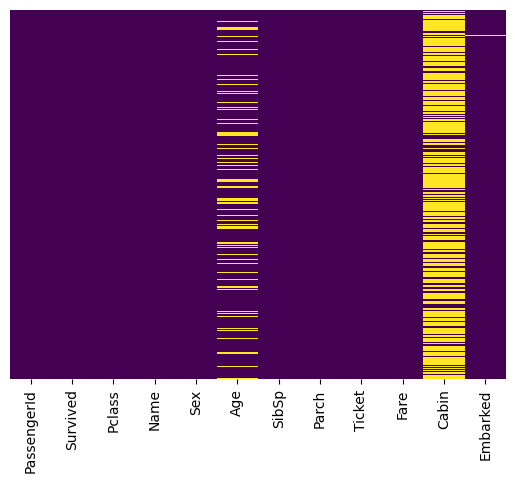

In [ ]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap="viridis")


Roughly 20 percent of the Age data is missing. The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation. Looking at the Cabin column, it looks like we are just missing too much of that data to do something useful with at a basic level. We'll probably drop this later, or change it to another feature like "Cabin Known: 1 or 0"

Let's explore more !!!

<ipython-input-7-115c2769d096>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Survived", data=train, palette="RdBu_r")


<Axes: xlabel='Survived', ylabel='count'>

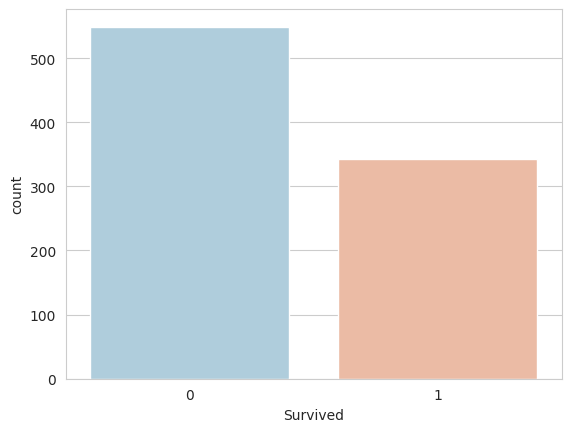

In [ ]:
# Create a countplot to visualize features
sns.set_style("whitegrid")
sns.countplot(x="Survived", data=train, palette="RdBu_r")

<Axes: xlabel='Survived', ylabel='count'>

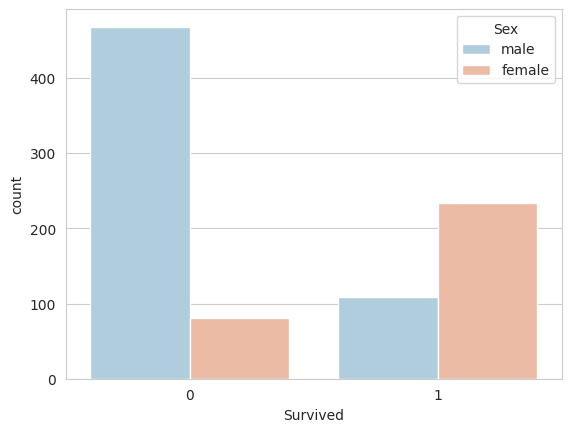

In [ ]:
sns.set_style("whitegrid")
sns.countplot(x="Survived", hue="Sex", data=train, palette="RdBu_r")

<Axes: xlabel='Survived', ylabel='count'>

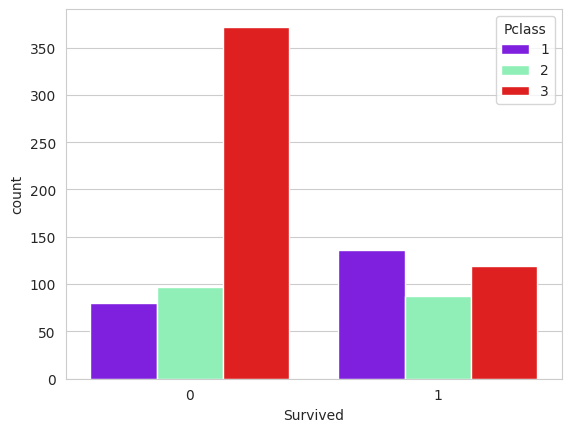

In [ ]:
sns.set_style("whitegrid")
sns.countplot(x="Survived", hue="Pclass", data=train, palette="rainbow")

<Axes: xlabel='Age', ylabel='Count'>

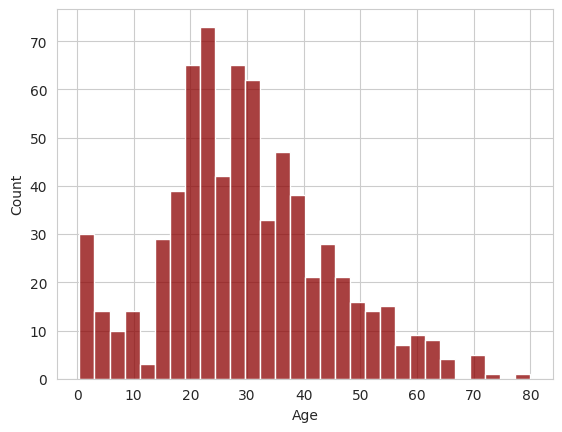

In [ ]:
sns.histplot(train["Age"].dropna(), kde=False, color="darkred", bins=30)

## Data Cleaning

We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the `mean` age of all the passengers (imputation). However we can be smarter about this and check the average age by passenger class. For example:

<ipython-input-17-6a0c1eb62c75>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Pclass", y="Age", data=train, palette="winter")


<Axes: xlabel='Pclass', ylabel='Age'>

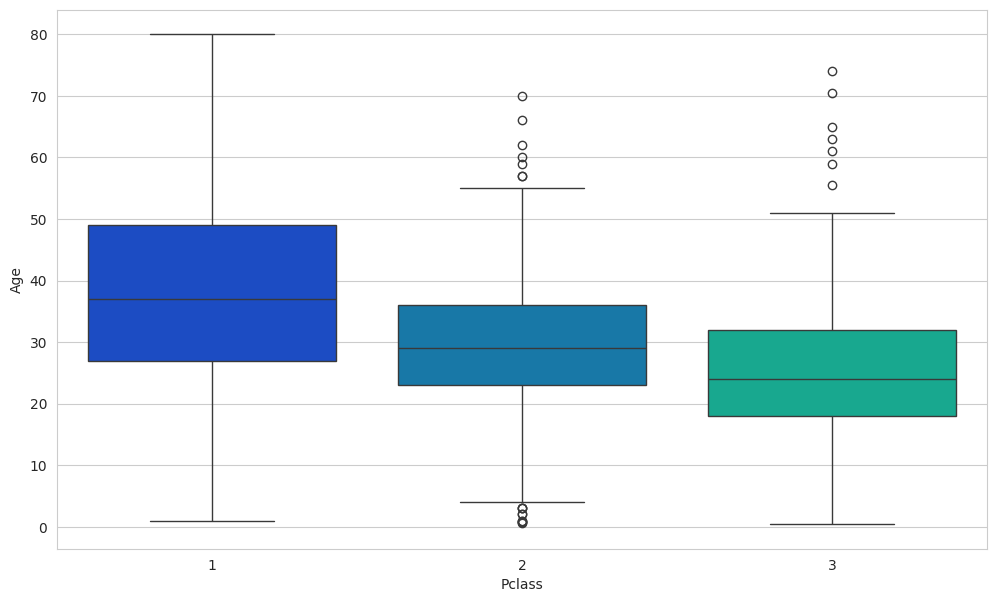

In [ ]:
# Create a histogram to visualize the distribution of age
plt.figure(figsize=(12,7))
sns.boxplot(x="Pclass", y="Age", data=train, palette="winter")

We can see the wealthier passengers in the higher classes tend to be older, which makes sense. We'll use these average age values to impute based on Pclass for Age.

In [ ]:
def impute_age(cols):
  """
    Define a function to impute missing age values based on passenger class
  """
  Age = cols[0]
  Pclass = cols[1]

  if pd.isnull(Age):

    if Pclass == 1:
      return 37

    elif Pclass == 2:
      return 29

    else:
      return 24

  else:
    return Age

In [ ]:
train["Age"] = train[["Age", "Pclass"]].apply(impute_age, axis=1) # Apply the impute_age function to fill missing Age values

<ipython-input-20-2f8f612adc99>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age = cols[0]
<ipython-input-20-2f8f612adc99>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass = cols[1]


<Axes: >

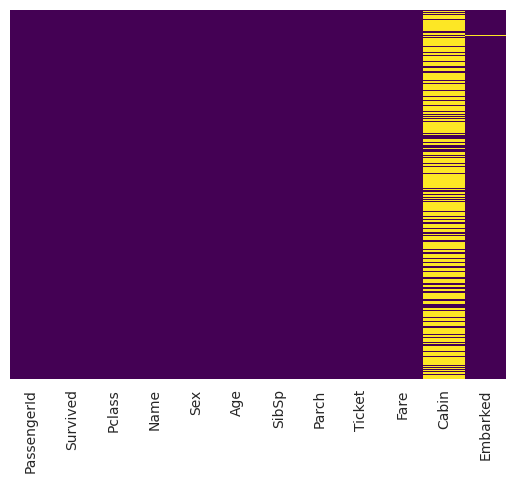

In [ ]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap="viridis")

Let's handle the cabin feature.
- Drop the Cabin column as it has too many missing values.

In [ ]:
train.drop("Cabin", axis=1, inplace=True)

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


Create a heatmap to visualize missing data after handle all missing values

<Axes: >

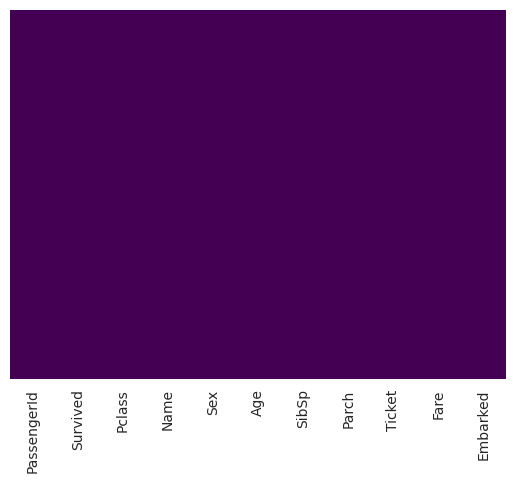

In [ ]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap="viridis")